# Проект
# Проверка гипотез по увеличению выручки в интернет-магазине — оценка результатов A/B теста

## ЧАСТЬ I. Приоритизация гипотез

### Ознакомление с данными:


В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами:  
- Hypothesis — краткое описание гипотезы;  
- Reach — охват пользователей по 10-балльной шкале;  
- Impact — влияние на пользователей по 10-балльной шкале;  
- Confidence — уверенность в гипотезе по 10-балльной шкале;  
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.  

In [1]:
import pandas as pd #импортируем необходимые библиотеки
import scipy.stats as stats
import numpy as np
import math as mth
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
hyp = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
pd.options.display.max_colwidth = 120

In [4]:
hyp

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
hyp.columns = hyp.columns.str.lower() # приведем названия полей к нижнему регистру

### Применение фреймворка ICE

In [6]:
hyp['ice'] = hyp['impact'] * hyp['confidence'] / hyp['efforts']

In [7]:
hyp.sort_values(by='ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


### Применение фреймворка RICE

In [8]:
hyp['rice'] = hyp['impact'] * hyp['confidence'] * hyp['reach'] / hyp['efforts']

In [9]:
hyp.sort_values(by='rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


   **ЗАКЛЮЧЕНИЕ ПО ПРИОРИТИЗАЦИИ ГИПОТЕЗ:** 
- согласно фреймворку ICE лидерами стали гипотезы о скидке в день рождения, о двух каналах привлечения и о форме подписки;
- согласно фреймворку RICE лидерами стали гипотезы о форме подписки, блоках рекомендаций и о двух каналах привлечения;
- гипотеза о скидке в день рождения упала в рейтинге RICE по причине очень низкого охвата (ведь у очень малой доли пользователей день рождения наступает в обозримый период исследований);
- гипотезы о форме подписки, блоках рекомендаций стали приоритетными благодаря высокому значению охвата, так как эти изменения затрагивают структура сайта, а большинство пользователей, вероятно, делают заказ через сайт.

<div class="alert alert-success">

<b>✔️ Комментарий ревьюера:</b> И правда, при использовании RICE мы учитываем охват и приоритеты гипотез могут измениться

</div>

## ЧАСТЬ II. Анализ A/B-теста

### Ознакомление с данными:

Результаты проведения A/B-теста, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.  

Файл /datasets/orders.csv содержит:  
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.  

Файл /datasets/visitors.csv содержит:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [10]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [11]:
orders.columns = orders.columns.str.lower() #приводим названия столбцов к нижнему регистру
visitors.columns = visitors.columns.str.lower()

In [12]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [13]:
orders.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionid    1197 non-null int64
visitorid        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [15]:
orders['revenue'].describe()

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

In [16]:
orders.duplicated().sum() # проверка на дубликаты

0

In [17]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [18]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [19]:
visitors.duplicated().sum() # проверка на дубликаты

0

### График кумулятивной выручки по группам

In [20]:
datesgroups = orders[['date','group']].drop_duplicates()

In [21]:
ordersaggregated = datesgroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionid': 'nunique',
            'visitorid': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [22]:
orderscumulativeA = ordersaggregated.query('group=="A"')
orderscumulativeB = ordersaggregated.query('group=="B"')

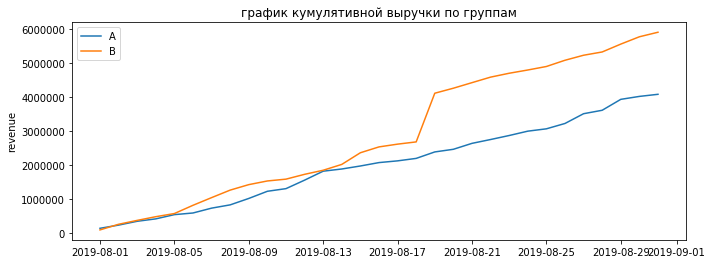

In [23]:
plt.figure(figsize=(11, 4))
plt.plot(orderscumulativeA['date'], orderscumulativeA['revenue'], label='A')
plt.plot(orderscumulativeB['date'], orderscumulativeB['revenue'], label='B')
plt.legend()
plt.ylabel('revenue')
plt.title('график кумулятивной выручки по группам')
plt.show()

**По результатам графиков кумулятивной выручки:**  
Группа B лидировала почти с самого начала наблюдений, помимо этого в районе 19 августа 2019 года кривая кумулятивной выручки группы B резко увеличилась.  
Вероятно, это связано с очень большим заказом/группой заказов в эти дни, потому что дальше тренд остается условно постоянным.

### График кумулятивного среднего чека по группам

In [24]:
orderscumulativeA['average_cheque'] = orderscumulativeA['revenue']/orderscumulativeA['transactionid']
orderscumulativeB['average_cheque'] = orderscumulativeB['revenue']/orderscumulativeB['transactionid']

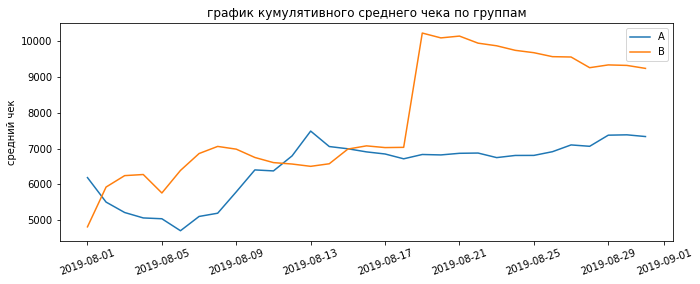

In [25]:
plt.figure(figsize=(11, 4))
plt.plot(orderscumulativeA['date'], orderscumulativeA['average_cheque'], label='A')
plt.plot(orderscumulativeB['date'], orderscumulativeB['average_cheque'], label='B')
plt.legend() 
plt.ylabel('средний чек')
plt.title('график кумулятивного среднего чека по группам')
plt.xticks(rotation=20)
plt.show()

**По результатам графиков кумулятивной выручки:**  
Группа B лидировала почти с самого начала наблюдений, помимо этого в районе 19 августа 2019 года кривая среднего чека группы B резко увеличилась.  
Значит, такое резкое увеличение среднего чека, как и кумулятивной выручки произошло из-за очень крупного заказа/серии заказов, которые сдвинули графики накопленных показателей в сторону увеличения.
При этом к 13 августа средний чек группы А опередил группу B, но потом снова снизился еще до 'аномального заказа' 19 августа.

### График относительного изменения кумулятивного среднего чека группы B к группе A

In [26]:
mergedcumulativeorders = (
    orderscumulativeA.merge(orderscumulativeB, 
                             left_on='date', 
                             right_on='date', 
                             how='left', 
                             suffixes=['A', 'B'])
)

In [27]:
mergedcumulativeorders.head()

,date,groupA,transactionidA,visitoridA,revenueA,average_chequeA,groupB,transactionidB,visitoridB,revenueB,average_chequeB
0,2019-08-01,A,24,20,148579,6190.791667,B,21,20,101217,4819.857143
1,2019-08-02,A,44,38,242401,5509.113636,B,45,43,266748,5927.733333
2,2019-08-03,A,68,62,354874,5218.735294,B,61,59,380996,6245.836066
3,2019-08-04,A,84,77,425699,5067.845238,B,78,75,489567,6276.500000
4,2019-08-05,A,109,100,549917,5045.110092,B,101,98,581995,5762.326733


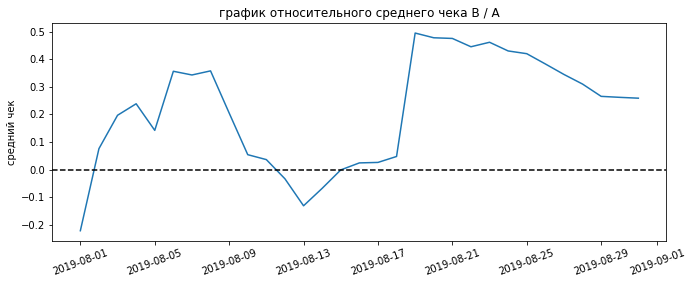

In [28]:
plt.figure(figsize=(11, 4))
plt.plot(mergedcumulativeorders['date'], 
         ( mergedcumulativeorders['average_chequeB']
         / mergedcumulativeorders['average_chequeA'] - 1))
plt.ylabel('средний чек')
plt.title('график относительного среднего чека B / A')
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation=20)
plt.show()

**По результатам графика относительного кумулятивного среднего чека:**  
Группа B лидировала почти с самого начала наблюдений, помимо этого в районе 19 августа 2019 года кривая среднего чека группы B резко увеличилась.  
Однако в районе 8 августа тренд изменился, достивнув того, что средний чек группы A стал больше среднего чека группы B. Затем анамальные значения вновь выдвинули группу B вперед.
В конце графика виден пологий участок, но в целом значения не выглядят стабильными, вероятно нужно больше данных для надежного исследования.

### График кумулятивной конверсии по группам

In [29]:
visitorsaggregated = (
    datesgroups.apply(lambda x: 
                      visitors[np.logical_and(visitors['date'] <= x['date'], 
                                              visitors['group'] == x['group'])]
                      .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), 
                      axis=1).sort_values(by=['date','group'])
)

In [30]:
cumulativedata = visitorsaggregated.merge(ordersaggregated,
                                          on=['date', 'group'])

In [31]:
cumulativedata['conversion'] = cumulativedata['visitorid'] / cumulativedata['visitors']

In [32]:
cumulativedataA = cumulativedata.query('group=="A"')

In [33]:
cumulativedataB = cumulativedata.query('group=="B"')

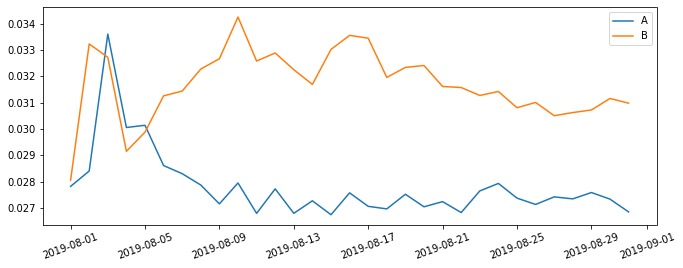

In [34]:
plt.figure(figsize=(11, 4))
plt.plot(cumulativedataA['date'], cumulativedataA['conversion'], label='A')
plt.plot(cumulativedataA['date'], cumulativedataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation=20)
plt.show()

**По графикам кумулятивной конверсии:**
- Группа B на протяжении почти всего времени наблюдений обладает лучшей конверсией;
- В отличие от кумулятивной выручки и кумулятивного среднего чека, нет никаких резких скачков в районе 19 августа, а это значит, что при стабильной конверсии, выручка в группе B резко увеличивалась из-за аномально дорогих заказов.

### График относительного изменения кумулятивной конверсии группы B к группе A

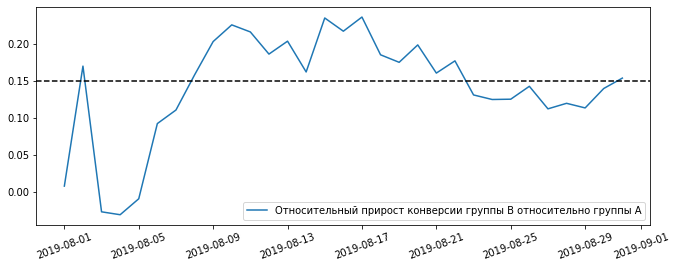

In [35]:
plt.figure(figsize=(11, 4))
mergedcumulativeconversions = (
    cumulativedataA[['date','conversion']].merge(cumulativedataB[['date','conversion']], 
                                                 left_on='date', right_on='date', 
                                                 how='left', suffixes=['A', 'B'])
)

plt.plot(mergedcumulativeconversions['date'], 
         mergedcumulativeconversions['conversionB']
         / mergedcumulativeconversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.axhline(y=0.15, color='black', linestyle='--') 
plt.xticks(rotation=20)
plt.legend()

**Относительный прирост конверсии группы B** относительно группы А осциллируюет около значения 0,15 примерно с 6 дня наблюдений.  
Несмотря на то, что значение относительного прироста между группами еще окончательно не установилось, но группа B показывает в среднем более высокий уровень относительной конверсии.

### Точечный график количества заказов по пользователям

In [36]:
ordersgrouped = orders.groupby('visitorid')['transactionid'].count().reset_index()

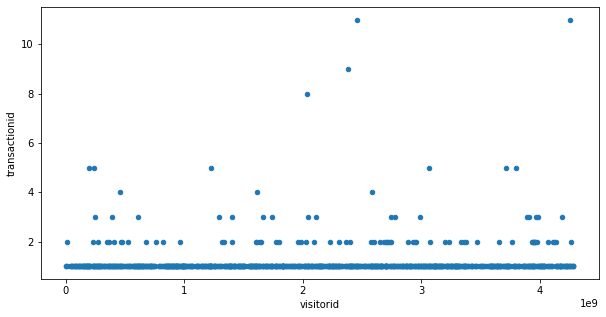

In [37]:
ordersgrouped.plot(x='visitorid', y='transactionid',
                   kind='scatter', figsize=(10, 5))

По точечному графику количества заказов видно, что большинство пользователей совершает не более 1 заказа.   
Чтобы получить более детальные характеристики для выявления аномальных пользователей, далее посчитаем процентили:

### Расчет 95-го и 99-го перцентиля количества заказов на пользователя

In [38]:
print(np.percentile(ordersgrouped['transactionid'], [95, 99]))

[2. 4.]


В качестве границы для определения **"аномальных"** пользователей выберем 99-ый процентиль, то есть **5 и более заказов**, так как пользователи которые делают 3 или 4 заказа не кажутся аномальными.  
К тому же скачок по кумулятивному среднему чеку был зафиксирован в районе 19 августа, также как и у кумулятивной выручки, значит аномальные значения выручки в группе B связаны со стоимостью заказа, а не с количеством заказов от одних и тех же пользователей.

### Точечный график стоимости заказов

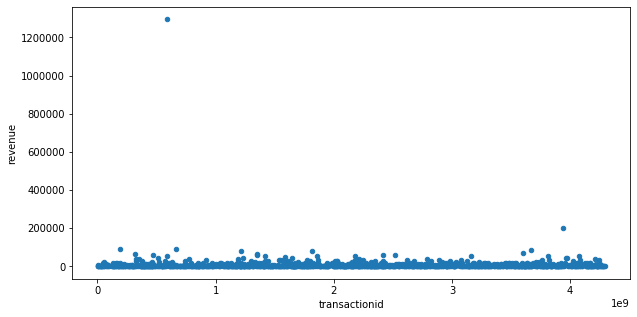

In [39]:
orders.plot(kind='scatter', x='transactionid', y='revenue', figsize=(10, 5))

In [40]:
orders['revenue'].sort_values(ascending=False).head()

425     1294500
1196     202740
858       93940
1136      92550
744       86620
Name: revenue, dtype: int64

По точечному графику стоимости и таблице выше заказа видно, что буквально 2 заказа обладают стоимостью более 100000 у.е.   


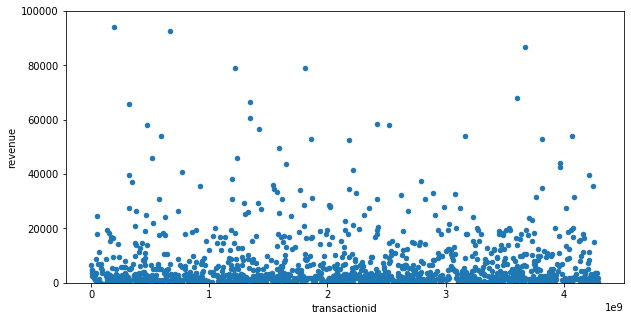

In [41]:
orders.plot(kind='scatter', x='transactionid', y='revenue', figsize=(10, 5), ylim=(0, 100000))

### Расчет 95-го и 99-го перцентиля стоимости заказа

In [42]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


По предварительному анализу стоимость заказов сильно влияет на показатели кумулятивной выручки и кумулятивного среднего чека, поэтому предалагаю обозначить **"аномальными"** заказы 95-го процентиля, то есть **со стоимостью более 28000 у.е.**

### Расчет статистической значимости различий в конверсии между группами по «сырым» данным

Первым действием получим посетителей за день для двух групп:

In [43]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

In [44]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

Далее получим кумулятивное число посетителей для каждой группы на основе ранее созданной таблицы "cumulativedata":

In [45]:
visitorsACummulative = cumulativedata.query('group=="A"')[['date', 'visitors']]
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [46]:
visitorsBCummulative = cumulativedata.query('group=="B"')[['date', 'visitors']]
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

Теперь получим число заказов и прибыль за день для каждой группы:

In [47]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': 'nunique', 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

In [48]:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': 'nunique', 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

Далее получим кумулятивное число заказов и кумулятивную прибыль для каждой группы на основе ранее созданной таблицы "cumulativedata":

In [49]:
ordersACummulative = cumulativedata.query('group=="A"')[['date','transactionid', 'revenue']]
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

In [50]:
ordersBCummulative = cumulativedata.query('group=="B"')[['date','transactionid', 'revenue']]
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

Далее объединим все полученные таблицы:

In [51]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [52]:
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Создадим переменные 'ordersByUsersA' и 'ordersByUsersB'. Для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов:

In [53]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)
ordersByUsersA.columns = ['userId', 'orders']

In [54]:
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)
ordersByUsersB.columns = ['userId', 'orders']

In [55]:
sampleA = pd.concat(
    [ordersByUsersA['orders'], 
     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum()
                                  - len(ordersByUsersA['orders'])), name='orders')], axis=0
)

In [56]:
sampleB = pd.concat(
    [ordersByUsersB['orders'], 
     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum()
                                  - len(ordersByUsersB['orders'])), name='orders')], axis=0
)

Нулевая и альтернативная гипотезы будут сформулированы следующим образом:
- **H**0 **: Средняя конверсия пользователей из группы B равна средней конверсии пользователей из группы А**
- **H**1 **: Средняя конверсия пользователей из группы B отличается от средней конверсии пользователей из группы А**

При этом **альтернативная гипотеза является двусторонней**, то есть отклонения в любую сторону при достататочном уровне статистической значимости будут учитываться и не будут противоречить алтренативной гипотезе.   
Критический уровень статистической значимости **alpha** установим согласно общей практике значением **0,05**.

Для ненормального распределения величин в sampleA и sampleB для проверки статистической значимости конверсии воспользуемся непараметрическим критерием Манна-Уитни:

In [57]:
round(stats.mannwhitneyu(sampleA, sampleB)[1], 4)

0.0084

In [58]:
round(sampleB.mean() / sampleA.mean() - 1, 3)

0.138

P-value значительно меньше 0,05 и ниже даже 0,01.   
Это означает, что различия в конверсии между группами B и A на "сырых" данных статистически значимы, при этом отношение конверсии B к А показывает значение в 13,8%.  
Соответсвенно, нулевую гипотеза о равенстве конверсий отвергаем. 

### Расчет статистической значимости различий в среднем чеке между группами по «сырым» данным

Нулевая и альтернативная гипотезы будут сформулированы следующим образом:
- **H**0 **: Средний чек пользователей из группы B равен среднему чеку пользователей из группы А**
- **H**1 **: Средний чек пользователей из группы B отличается от среднего чека пользователей из группы А**

При этом **альтернативная гипотеза является двусторонней**, то есть отклонения в любую сторону при достататочном уровне статистической значимости будут учитываться и не будут противоречить алтренативной гипотезе.   
Критический уровень статистической значимости **alpha** установим согласно общей практике значением **0,05**.

In [59]:
round((stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                          orders[orders['group']=='B']['revenue'])[1]), 3)

0.365

In [60]:
round((orders[orders['group']=='B']['revenue'].mean()
      /orders[orders['group']=='A']['revenue'].mean()-1), 3)

0.259

Не смотря на то, что средний чек группы B больше чека группы на 26%, признать статистически значимыми данные различия нельзя, так как P-value непараметрического метода Манна-Уитни равен 0,365, что значительно выше значения 0,05 и даже выше 0,1.

### Расчет статистической значимости различий в конверсии между группами по «очищенным» данным

Получим список пользователей с числом заказов более 4:

In [61]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['userId'],
    ],
    axis=0,
)

Получим список пользователей с заказами стоимостью выше 28000:

In [62]:
orders = orders.rename(columns={'visitorid':'userId'})

In [63]:
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['userId']

Получим список пользователей с заказами стоимостью выше 28000 и числом заказов больше 4:

In [64]:
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [65]:
len(abnormalUsers)

59

Получим списки числа заказов для пользователей двух групп по очищенным данным:

In [66]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [67]:
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [68]:
round((stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]), 3)

0.009

In [69]:
round((sampleBFiltered.mean()/sampleAFiltered.mean()-1), 3) 

0.145

P-value значительно меньше 0,05 и ниже даже 0,01.   
Это означает, что различия в конверсии между группами B и A на "очищенных" данных статистически значимы, при этом отношение конверсии B к А показывает значение в 14,5%.  
При этом особых различий при исследовании сырых и очищенных данных нет. 
Разница статистически значима в обоих случаях.

### Расчет статистической значимости различий в среднем чеке между группами по «очищенным» данным

In [70]:
display(
    round((
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    ), 3
))

0.481

In [71]:
display(
    round((
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['userId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    ), 3
))

-0.014

Значение p-value увеличилось до 0,481 после удаления аномальных заказов.   
При это после "чистки" отношение группы B к группе A поменяло знак, то есть теперь средний чек у группы B стал больше, но разница в 1,4% не является статистически значимой, так как благодаря p-value = 0,481 нет оснований считать средние чеки неравными.

### Результаты:

- Существует статистически значимое различие по конверсии между группами как по «сырым», так и по данным после фильтрации аномалий, группа B значительно опережает группу A;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий, при этом после фильтрации средний чек группы A стал больше чека группы B;
- График различия конверсии между группами сообщает, что результаты группы B значительно лучше группы A данная тенденция носит относительно стабильный характер;
- График различия среднего чека говорит о том, что на средний чек сильно влияли дорогие заказы, при этом нельзя сказать, какая группа имеет худший средний чек. При этом нет оснований пологать, что продолжая исследование, можно получить результат с "явным лидером"

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным:
- конверсия группы B значительно лучше;
- значимых различий в среднем чека между группами нет.